GIF saved as random_action1.gif from 150 frames.


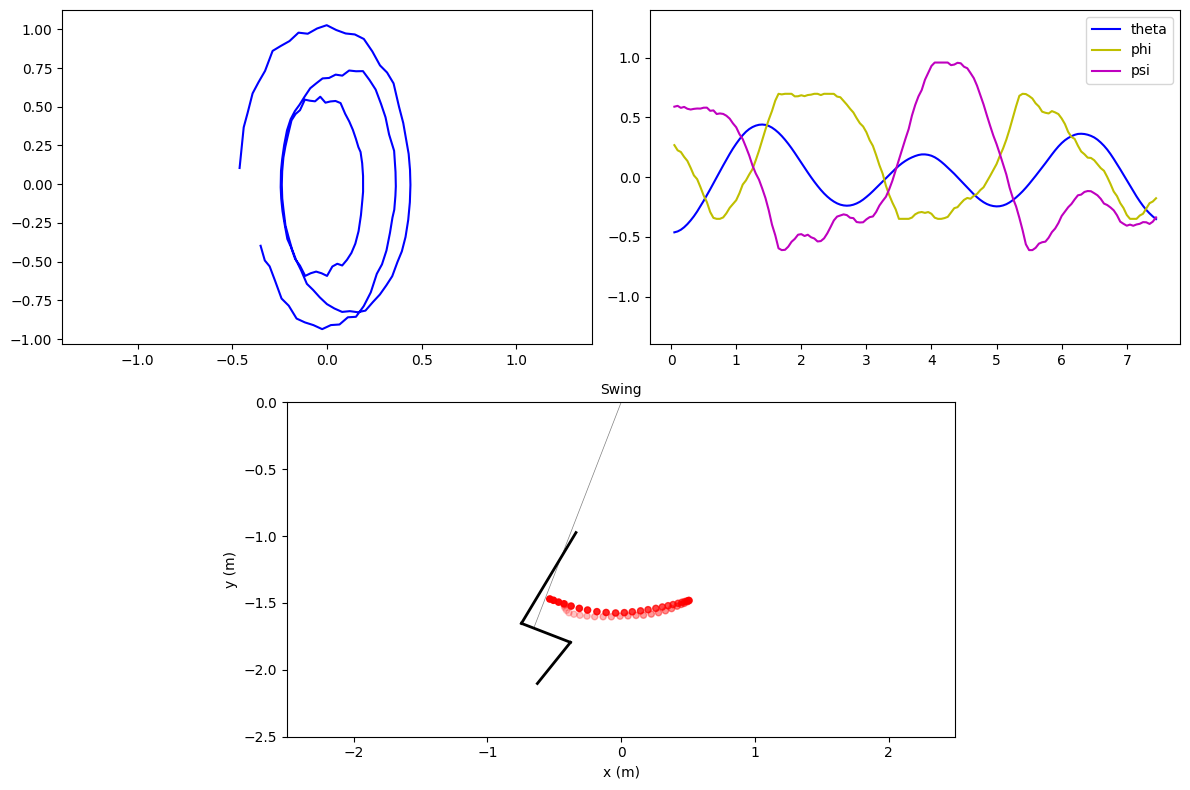

In [1]:
from playground_swing_rl.env.playground_swing import PlaygroundSwingEnv

# Create the environment with rendering enabled
env = PlaygroundSwingEnv(render_mode='gif-plots')
data = []
# Reset the environment to get the initial observation
# obs, info = env.reset(options={'theta': 33, 'phi': env.phi_mean, 'psi': env.psi_mean})
obs, info = env.reset()

# Run a short demo with random actions
for step in range(150):
    action = env.action_space.sample()  # Take a random action
    obs, reward, terminated, truncated, info = env.step(action)
    data.append({'theta': obs[0], 'theta_d': obs[1], 'phi': obs[2], 'phi_d': obs[3], 'psi': obs[4], 'psi_d': obs[5]})
env.save_gif_from_frames('random_action1.gif')